In [1]:
from IPython.display import display, HTML

display(
    HTML("""
<style>
div.container{width:80% !important;}
div.prompt {min-width:70px;}
div#toc-header{margin-top:150px;}
span.toc-item-num{display:none;}
div.CodeMirror {font-family:Consolas}
div.input {font-family:Consolas}
</style>
"""))

In [2]:
import numpy as np
import pandas as pd
import sys
from tensorflow.keras import utils  # utils.to_categorical
from tensorflow.keras.models import Sequential    # 모델 생성
from tensorflow.keras.layers import Dense, Input  # 모델에 layer 쌓기
import matplotlib.pyplot as plt

# 로지스틱회귀분석(이진분류)
## 1. 데이터셋 생성 & 전처리

In [3]:
df = pd.read_csv('data/pima-indians-diabetes.csv', comment='#', header=None)
df.info(), df.values[:2]
# 결측치가 없으므로, csv 파일을 바로 넘파이 배열로 읽어들일 예정

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    int64  
 2   2       768 non-null    int64  
 3   3       768 non-null    int64  
 4   4       768 non-null    int64  
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(None,
 array([[  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
          50.   ,   1.   ],
        [  1.   ,  85.   ,  66.   ,  29.   ,   0.   ,  26.6  ,   0.351,
          31.   ,   0.   ]]))

In [4]:
# np.set_printoptions(threshold=sys.maxsize)

In [5]:
# 1. 임신횟수
# 2. 2시간내 포도당 농도
# 3. 혈압
# 4. 피부접힘 두께
# 5. 인슐린수치
# 6. BMI체질량지수
# 7. 가족력
# 8. 나이
# 9. 당뇨병발병여부

In [6]:
# csv파일을 numpy배열로 읽어오기 np.loadtxt(), np.genfromtxt()  '#'이 있는 행은 제외하여 읽어옴
dataset = np.loadtxt('data/pima-indians-diabetes.csv', delimiter=',',  # ','를 기준으로 분리
                     )
dataset.shape

(768, 9)

In [7]:
# 학습데이터셋(학습용 데이터:train dataset) : 모델 학습 시 사용
X_train = dataset[:700, :-1]  # 독립변수
y_train = dataset[:700,  -1]  # 종속변수
# 테스트데이터셋(시험용 데이터:test dataset) : 모델 평가 시 사용
X_test = dataset[700:, :-1]
y_test = dataset[700:,  -1]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((700, 8), (700,), (68, 8), (68,))

## 2. 모델 구성

In [8]:
model = Sequential()
model.add(Input(shape=(8, )))                    # 독립변수 8개 : 입력, 종속변수 1개 : 출력 
model.add(Dense(units=12, activation='relu'))    # hidden layer  # units : 출력갯수
model.add(Dense(units=8, activation='relu'))     # hidden layer  # units : 출력갯수
model.add(Dense(units=1,  activation='sigmoid')) # 최종 출력층
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


## 3. 학습과정 설정

In [9]:
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

## 4. 학습

In [10]:
hist = model.fit(X_train, y_train,  # 훈련(학습)데이터
                 epochs=200,        # 300번 학습
                 # batch_size=350,  # 350개씩 나눠서
                 # validation_split=0.2,  # 검증데이터 비율(훈련데이터셋 중 20%를 검증용 데이터로)
                 verbose=2
                )

Epoch 1/200
22/22 - 1s - loss: 6.7580 - binary_accuracy: 0.6571 - 620ms/epoch - 28ms/step
Epoch 2/200
22/22 - 0s - loss: 2.9677 - binary_accuracy: 0.6586 - 25ms/epoch - 1ms/step
Epoch 3/200
22/22 - 0s - loss: 1.5473 - binary_accuracy: 0.6400 - 34ms/epoch - 2ms/step
Epoch 4/200
22/22 - 0s - loss: 1.0546 - binary_accuracy: 0.6443 - 23ms/epoch - 1ms/step
Epoch 5/200
22/22 - 0s - loss: 0.8514 - binary_accuracy: 0.6386 - 25ms/epoch - 1ms/step
Epoch 6/200
22/22 - 0s - loss: 0.7449 - binary_accuracy: 0.5957 - 29ms/epoch - 1ms/step
Epoch 7/200
22/22 - 0s - loss: 0.7182 - binary_accuracy: 0.6029 - 27ms/epoch - 1ms/step
Epoch 8/200
22/22 - 0s - loss: 0.7064 - binary_accuracy: 0.6271 - 23ms/epoch - 1ms/step
Epoch 9/200
22/22 - 0s - loss: 0.6897 - binary_accuracy: 0.6271 - 26ms/epoch - 1ms/step
Epoch 10/200
22/22 - 0s - loss: 0.6927 - binary_accuracy: 0.6114 - 31ms/epoch - 1ms/step
Epoch 11/200
22/22 - 0s - loss: 0.6794 - binary_accuracy: 0.6371 - 42ms/epoch - 2ms/step
Epoch 12/200
22/22 - 0s - lo

Epoch 93/200
22/22 - 0s - loss: 0.5467 - binary_accuracy: 0.7329 - 29ms/epoch - 1ms/step
Epoch 94/200
22/22 - 0s - loss: 0.5430 - binary_accuracy: 0.7443 - 29ms/epoch - 1ms/step
Epoch 95/200
22/22 - 0s - loss: 0.5446 - binary_accuracy: 0.7271 - 19ms/epoch - 861us/step
Epoch 96/200
22/22 - 0s - loss: 0.5463 - binary_accuracy: 0.7314 - 22ms/epoch - 1ms/step
Epoch 97/200
22/22 - 0s - loss: 0.5433 - binary_accuracy: 0.7357 - 34ms/epoch - 2ms/step
Epoch 98/200
22/22 - 0s - loss: 0.5442 - binary_accuracy: 0.7386 - 26ms/epoch - 1ms/step
Epoch 99/200
22/22 - 0s - loss: 0.5372 - binary_accuracy: 0.7457 - 22ms/epoch - 989us/step
Epoch 100/200
22/22 - 0s - loss: 0.5402 - binary_accuracy: 0.7429 - 30ms/epoch - 1ms/step
Epoch 101/200
22/22 - 0s - loss: 0.5440 - binary_accuracy: 0.7286 - 23ms/epoch - 1ms/step
Epoch 102/200
22/22 - 0s - loss: 0.5424 - binary_accuracy: 0.7257 - 26ms/epoch - 1ms/step
Epoch 103/200
22/22 - 0s - loss: 0.5396 - binary_accuracy: 0.7400 - 26ms/epoch - 1ms/step
Epoch 104/200

Epoch 184/200
22/22 - 0s - loss: 0.4963 - binary_accuracy: 0.7500 - 19ms/epoch - 877us/step
Epoch 185/200
22/22 - 0s - loss: 0.4947 - binary_accuracy: 0.7629 - 23ms/epoch - 1ms/step
Epoch 186/200
22/22 - 0s - loss: 0.4966 - binary_accuracy: 0.7529 - 27ms/epoch - 1ms/step
Epoch 187/200
22/22 - 0s - loss: 0.4956 - binary_accuracy: 0.7643 - 21ms/epoch - 947us/step
Epoch 188/200
22/22 - 0s - loss: 0.4933 - binary_accuracy: 0.7643 - 30ms/epoch - 1ms/step
Epoch 189/200
22/22 - 0s - loss: 0.4956 - binary_accuracy: 0.7600 - 32ms/epoch - 1ms/step
Epoch 190/200
22/22 - 0s - loss: 0.4931 - binary_accuracy: 0.7643 - 20ms/epoch - 887us/step
Epoch 191/200
22/22 - 0s - loss: 0.4994 - binary_accuracy: 0.7529 - 34ms/epoch - 2ms/step
Epoch 192/200
22/22 - 0s - loss: 0.5086 - binary_accuracy: 0.7500 - 28ms/epoch - 1ms/step
Epoch 193/200
22/22 - 0s - loss: 0.4968 - binary_accuracy: 0.7557 - 19ms/epoch - 863us/step
Epoch 194/200
22/22 - 0s - loss: 0.4954 - binary_accuracy: 0.7586 - 23ms/epoch - 1ms/step
Ep

## 5. 모델 평가하기(학습과정 보기 및 평가)

In [11]:
hist.history.keys()

dict_keys(['loss', 'binary_accuracy'])

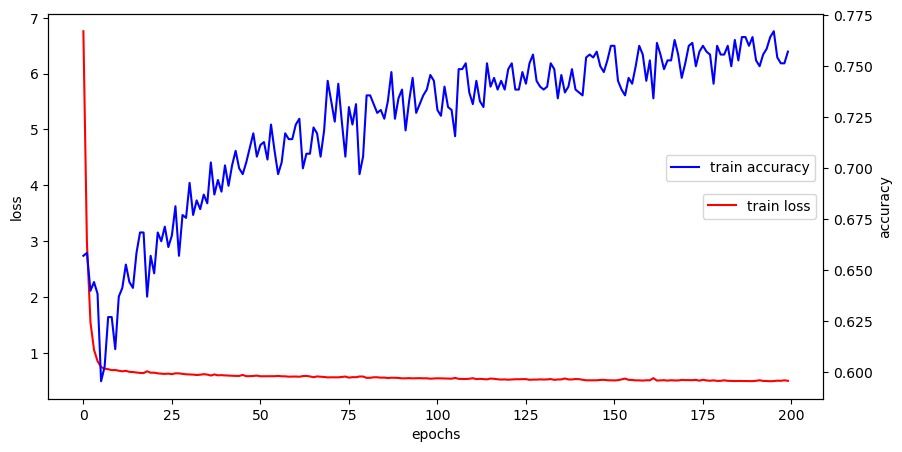

In [12]:
# 학습과정 보기(validation dataset 없는 경우)
fig, loss_ax = plt.subplots(figsize=(10, 5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['binary_accuracy'], 'b', label='train accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.65))
plt.show()

In [13]:
# 모델 평가하기(X)
model.evaluate(X_train, y_train)

22/22 [==============================] - 0s 2ms/step - loss: 0.5084 - binary_accuracy: 0.7557


[0.5084280371665955, 0.7557142972946167]

In [14]:
# 모델 평가하기(O)
score = model.evaluate(X_test, y_test)
print('loss : {}, accuracy : {}%'.format(score[0], score[1]*100))

3/3 [==============================] - 0s 7ms/step - loss: 0.6347 - binary_accuracy: 0.7206
loss : 0.6347471475601196, accuracy : 72.0588207244873%


## 6. 모델 사용하기

In [15]:
X_train[0], y_train[10]

(array([  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
         50.   ]),
 0.0)

In [16]:
model.predict([[6, 148, 72, 35, 0, 33.6, 0.6, 50]])

1/1 [==============================] - 0s 124ms/step


array([[0.636417]], dtype=float32)

In [17]:
model.predict([[6, 148, 72, 35, 0, 33.6, 0.6, 50]]) >= 0.5

1/1 [==============================] - 0s 48ms/step


array([[ True]])

In [18]:
(model.predict([[6, 148, 72, 35, 0, 33.6, 0.6, 50],
               [6, 148, 72, 35, 0, 33.6, 0.6, 45]]) >= 0.5).astype(int)

1/1 [==============================] - 0s 49ms/step


array([[1],
       [1]])

In [19]:
model.predict([[6, 148, 72, 35, 0, 33.6, 0.6, 50]]).round()

1/1 [==============================] - 0s 44ms/step


array([[1.]], dtype=float32)

## 7. 교차표
 - 테스트 데이터셋의 실제값(y_test)과 예측값

In [20]:
y_test

array([0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.])

In [21]:
y_hat = (model.predict(X_test) >= 0.5).astype(float)  # X_test : 2차원 배열
cnt1 = 0
cnt2 = 0
cnt3 = 0
cnt4 = 0
# y_hat.shape : 2차원, y_test.shape : 1차원
y_hat.reshape(-1)   # 1차원으로
y_test.reshape(-1)  # 1차원으로
for h, y in zip(y_hat.reshape(-1), y_test.reshape(-1)):
    # print(h, y)
    if h == 1.0 and y == 1.0:
        cnt1 += 1
    elif y == 1.0 and h == 0.0:
        cnt2 += 1
    elif y == 0.0 and h == 1.0:
        cnt3 += 1
    else:
        cnt4 += 1
print(cnt1, cnt2)
print(cnt3, cnt4)

3/3 [==============================] - 0s 2ms/step
15 12
7 34


In [22]:
# 교차표를 만드는 함수
#                  ┌ 1차원 실제값
ctab = pd.crosstab(y_test, y_hat.reshape(-1))
#                          └ 2차원->1차원 예측값
ctab.index.name   = '실제값'
ctab.columns.name = '예측값'
ctab

예측값,0.0,1.0
실제값,,
0.0,34,7
1.0,12,15


# 분류분석
1. 데이터셋 생성 및 전처리 : 훈련셋600, 검증셋100, 테스트셋68으로 분리, 종속변수의 원핫인코딩
2. 모델 생성(input 8, target 2(0, 1)) : 출력층에서의 활성화함수 'softmax' <br>
 model.summary()에서 파라미터 수 확인
3. 모델 학습과정 설정 : loss='categorical_crossentropy', metrics=['accuracy'] (다중분류)
4. 모델 학습 : validation_data=[X_val, Y_val] 추가해서 학습
5. 모델 학습평가 <br>
 5-1 그래프(hist.history.keys()를 확인 후 4가지) <br>
 5-2 평가(X_test, Y_test) <br>
 5-3 교차표(pd.crosstab 이용)
6. 모델 사용하기 - 예측 <br>
    0      1         <br>
    0.9912 0.00124

In [1]:
import numpy as np
import sys
from tensorflow.keras import utils  # utils.to_categorical
from tensorflow.keras.models import Sequential    # 모델 생성
from tensorflow.keras.layers import Dense, Input  # 모델에 layer 쌓기
import matplotlib.pyplot as plt

In [2]:
# 1. 데이터셋 생성 및 전처리 : 훈련셋600, 검증셋100, 테스트셋68으로 분리, 종속변수의 원핫인코딩
dataset = np.loadtxt('data/pima-indians-diabetes.csv', delimiter=',')
dataset.shape

(768, 9)

In [3]:
X_train = dataset[:600, :-1]
Y_train = dataset[:600, -1]
X_val   = dataset[600:700, :-1]
Y_val   = dataset[600:700, -1]
X_test  = dataset[700:, :-1]
Y_test  = dataset[700:, -1]
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape

((600, 8), (600,), (100, 8), (100,), (68, 8), (68,))

In [4]:
# Y_train = pd.get_dummies(Y_train).values
Y_train = utils.to_categorical(Y_train)
Y_val   = utils.to_categorical(Y_val)
Y_test  = utils.to_categorical(Y_test)
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape

((600, 8), (600, 2), (100, 8), (100, 2), (68, 8), (68, 2))

In [5]:
# 2. 모델 생성(input 8, target 2(0, 1)) : 출력층에서의 활성화함수 'softmax'
model = Sequential()
model.add(Input(shape=(8, )))
model.add(Dense(units=12, activation='relu'))
model.add(Dense(units=8,  activation='relu'))
model.add(Dense(units=2,  activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 2)                 18        
                                                                 
Total params: 230
Trainable params: 230
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
# 3. 모델 학습과정 설정 : loss='categorical_crossentropy', metrics=['accuracy'] (다중분류)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
# 4. 모델 학습 : validation_data=[X_val, Y_val] 추가해서 학습
hist = model.fit(X_train, Y_train,
                 epochs=300,
                 # batch_size=300,
                 verbose=1,
                 validation_data=[X_val, Y_val])

Epoch 1/300
19/19 [==============================] - 0s 5ms/step - loss: 0.4967 - accuracy: 0.7550 - val_loss: 0.5131 - val_accuracy: 0.6900
Epoch 2/300
19/19 [==============================] - 0s 3ms/step - loss: 0.4975 - accuracy: 0.7700 - val_loss: 0.4984 - val_accuracy: 0.7400
Epoch 3/300
19/19 [==============================] - 0s 3ms/step - loss: 0.5032 - accuracy: 0.7700 - val_loss: 0.5114 - val_accuracy: 0.7500
Epoch 4/300
19/19 [==============================] - 0s 3ms/step - loss: 0.5350 - accuracy: 0.7317 - val_loss: 0.5984 - val_accuracy: 0.6800
Epoch 5/300
19/19 [==============================] - 0s 3ms/step - loss: 0.5149 - accuracy: 0.7467 - val_loss: 0.4970 - val_accuracy: 0.7300
Epoch 6/300
19/19 [==============================] - 0s 3ms/step - loss: 0.4850 - accuracy: 0.7650 - val_loss: 0.5600 - val_accuracy: 0.7000
Epoch 7/300
19/19 [==============================] - 0s 3ms/step - loss: 0.5079 - accuracy: 0.7467 - val_loss: 0.4986 - val_accuracy: 0.7500
Epoch 8/300
1

Epoch 59/300
19/19 [==============================] - 0s 3ms/step - loss: 0.4810 - accuracy: 0.7633 - val_loss: 0.4968 - val_accuracy: 0.8100
Epoch 60/300
19/19 [==============================] - 0s 3ms/step - loss: 0.4689 - accuracy: 0.7750 - val_loss: 0.5154 - val_accuracy: 0.7200
Epoch 61/300
19/19 [==============================] - 0s 3ms/step - loss: 0.4679 - accuracy: 0.7733 - val_loss: 0.4853 - val_accuracy: 0.7500
Epoch 62/300
19/19 [==============================] - 0s 3ms/step - loss: 0.4655 - accuracy: 0.7733 - val_loss: 0.5131 - val_accuracy: 0.7100
Epoch 63/300
19/19 [==============================] - 0s 3ms/step - loss: 0.4680 - accuracy: 0.7617 - val_loss: 0.4839 - val_accuracy: 0.7700
Epoch 64/300
19/19 [==============================] - 0s 3ms/step - loss: 0.4858 - accuracy: 0.7617 - val_loss: 0.5266 - val_accuracy: 0.7000
Epoch 65/300
19/19 [==============================] - 0s 3ms/step - loss: 0.4675 - accuracy: 0.7817 - val_loss: 0.4995 - val_accuracy: 0.7200
Epoch 

19/19 [==============================] - 0s 3ms/step - loss: 0.4719 - accuracy: 0.7717 - val_loss: 0.4868 - val_accuracy: 0.7500
Epoch 117/300
19/19 [==============================] - 0s 3ms/step - loss: 0.5042 - accuracy: 0.7617 - val_loss: 0.5687 - val_accuracy: 0.7000
Epoch 118/300
19/19 [==============================] - 0s 3ms/step - loss: 0.4816 - accuracy: 0.7717 - val_loss: 0.5330 - val_accuracy: 0.7900
Epoch 119/300
19/19 [==============================] - 0s 3ms/step - loss: 0.5003 - accuracy: 0.7767 - val_loss: 0.5061 - val_accuracy: 0.8000
Epoch 120/300
19/19 [==============================] - 0s 3ms/step - loss: 0.4555 - accuracy: 0.7817 - val_loss: 0.5284 - val_accuracy: 0.7800
Epoch 121/300
19/19 [==============================] - 0s 3ms/step - loss: 0.4771 - accuracy: 0.7800 - val_loss: 0.5103 - val_accuracy: 0.7200
Epoch 122/300
19/19 [==============================] - 0s 3ms/step - loss: 0.4527 - accuracy: 0.7983 - val_loss: 0.4748 - val_accuracy: 0.7600
Epoch 123/300

19/19 [==============================] - 0s 3ms/step - loss: 0.4408 - accuracy: 0.7983 - val_loss: 0.4811 - val_accuracy: 0.7800
Epoch 174/300
19/19 [==============================] - 0s 3ms/step - loss: 0.4358 - accuracy: 0.8233 - val_loss: 0.5185 - val_accuracy: 0.7500
Epoch 175/300
19/19 [==============================] - 0s 3ms/step - loss: 0.4545 - accuracy: 0.7867 - val_loss: 0.4682 - val_accuracy: 0.8000
Epoch 176/300
19/19 [==============================] - 0s 3ms/step - loss: 0.4450 - accuracy: 0.7917 - val_loss: 0.4853 - val_accuracy: 0.7600
Epoch 177/300
19/19 [==============================] - 0s 3ms/step - loss: 0.4350 - accuracy: 0.8083 - val_loss: 0.4682 - val_accuracy: 0.8100
Epoch 178/300
19/19 [==============================] - 0s 3ms/step - loss: 0.4628 - accuracy: 0.8000 - val_loss: 0.4723 - val_accuracy: 0.8400
Epoch 179/300
19/19 [==============================] - 0s 3ms/step - loss: 0.5063 - accuracy: 0.7533 - val_loss: 0.5042 - val_accuracy: 0.7300
Epoch 180/300

19/19 [==============================] - 0s 2ms/step - loss: 0.4454 - accuracy: 0.8050 - val_loss: 0.4743 - val_accuracy: 0.7900
Epoch 231/300
19/19 [==============================] - 0s 3ms/step - loss: 0.4356 - accuracy: 0.7917 - val_loss: 0.4676 - val_accuracy: 0.7700
Epoch 232/300
19/19 [==============================] - 0s 3ms/step - loss: 0.4301 - accuracy: 0.7967 - val_loss: 0.4813 - val_accuracy: 0.8000
Epoch 233/300
19/19 [==============================] - 0s 3ms/step - loss: 0.4311 - accuracy: 0.7983 - val_loss: 0.4826 - val_accuracy: 0.8400
Epoch 234/300
19/19 [==============================] - 0s 3ms/step - loss: 0.4497 - accuracy: 0.7933 - val_loss: 0.5186 - val_accuracy: 0.7800
Epoch 235/300
19/19 [==============================] - 0s 3ms/step - loss: 0.4305 - accuracy: 0.7917 - val_loss: 0.4690 - val_accuracy: 0.8000
Epoch 236/300
19/19 [==============================] - 0s 3ms/step - loss: 0.4368 - accuracy: 0.8067 - val_loss: 0.4808 - val_accuracy: 0.8100
Epoch 237/300

19/19 [==============================] - 0s 3ms/step - loss: 0.4372 - accuracy: 0.8050 - val_loss: 0.5081 - val_accuracy: 0.7300
Epoch 288/300
19/19 [==============================] - 0s 3ms/step - loss: 0.4428 - accuracy: 0.7983 - val_loss: 0.4920 - val_accuracy: 0.8200
Epoch 289/300
19/19 [==============================] - 0s 3ms/step - loss: 0.4532 - accuracy: 0.7917 - val_loss: 0.4742 - val_accuracy: 0.7900
Epoch 290/300
19/19 [==============================] - 0s 3ms/step - loss: 0.4245 - accuracy: 0.8017 - val_loss: 0.5718 - val_accuracy: 0.7500
Epoch 291/300
19/19 [==============================] - 0s 3ms/step - loss: 0.4745 - accuracy: 0.7867 - val_loss: 0.4730 - val_accuracy: 0.8000
Epoch 292/300
19/19 [==============================] - 0s 3ms/step - loss: 0.4398 - accuracy: 0.7883 - val_loss: 0.4720 - val_accuracy: 0.8200
Epoch 293/300
19/19 [==============================] - 0s 3ms/step - loss: 0.4541 - accuracy: 0.7967 - val_loss: 0.5187 - val_accuracy: 0.7100
Epoch 294/300

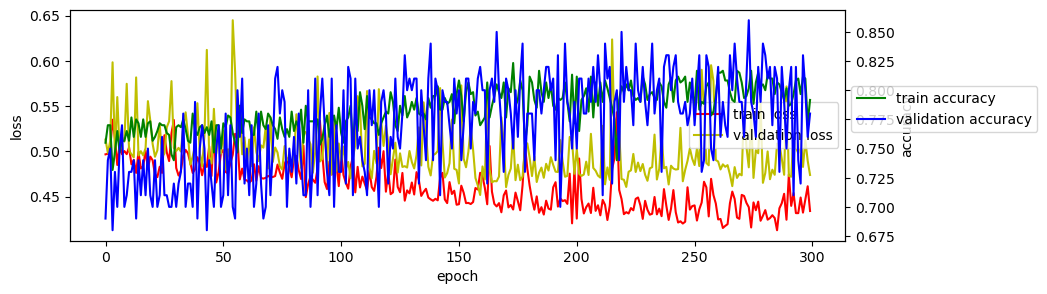

In [17]:
# 5. 모델 학습평가
# 5-1 그래프(hist.history.keys()를 확인 후 4가지)
# 학습과정 표시하기(validation dataset 있는 경우)
hist.history.keys()

fig, loss_ax = plt.subplots(figsize=(10, 3))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label= 'validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')


acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='validation accuracy')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='center right')
acc_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))

plt.show()

In [ ]:
# 5-2 평가(X_test, Y_test)

In [ ]:
# 5-3 교차표(pd.crosstab 이용)


In [ ]:
# 6. 모델 사용하기 - 예측